In [1]:
from tools import *

x_train, y_train, x_valid, y_valid = data_set_up()
print('%d samples in training set, %d samples in validation set' %(len(x_train), len(x_valid)))

50000 samples in training set, 10000 samples in validation set


45240th sample in training set


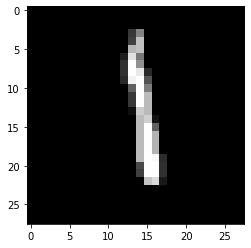

In [2]:
from matplotlib import pyplot
import numpy as np

show_sample_idx = np.random.randint(len(x_train))
print('%dth sample in training set' %show_sample_idx)
pyplot.imshow(x_train[show_sample_idx].reshape((28, 28)), cmap="gray")

In [3]:
import torch
import torch.nn.functional as F

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
n, c = x_train.shape
loss_func = F.cross_entropy

In [4]:
from torch.utils.data import TensorDataset, DataLoader

bs = 64  # batch size
epochs = 4

train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)

model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
fit(epochs, model, loss_func, opt, train_dl, valid_dl)


0 0.4225012183189392
1 0.28332517242431643
2 0.252161114025116
3 0.2141048433303833


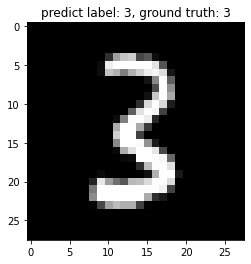

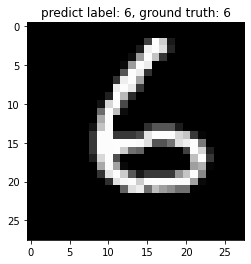

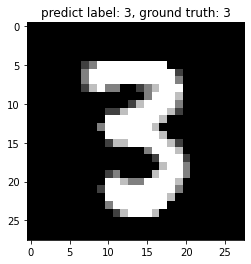

total samples 10000, correct prediction 9382


In [5]:
import matplotlib
%matplotlib inline

model.eval()
match_num = 0
total_num = 0

for idx, (xb, yb) in enumerate(valid_dl):
    prob_y = model(xb)
    pred_y = prob_y.argmax(dim=1)
    
    if idx%30 == 0:
        pyplot.title('predict label: %d, ground truth: %d' %(pred_y[0], yb[0]))
        pyplot.imshow(xb[0].reshape((28, 28)), cmap="gray")
        pyplot.show()

    total_num += len(yb)
    match_num += (yb == pred_y).sum()

print('total samples %d, correct prediction %d' %(total_num, match_num))    